# PW4: Genetic algorithms for optimization
*Alexandra Korukova, Samuel Mayor*  
*HEIG-VD - MLG - 30.05.2019*

In [1]:
from scipy import sin, cos, tan, arctan, arctan2, arccos, pi
import numpy as np
import math
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import GAllele
from pyevolve import Mutators
from pyevolve import Initializators
from pyevolve import DBAdapters
from pyevolve import Crossovers
from pyevolve import Consts
from pyevolve import Selectors
import sys, random
import matplotlib.pyplot as plt

In [2]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

In [3]:
# based on resolution of the TSP problem using GA, found on: 
# http://pyevolve.sourceforge.net/examples.html#example-12-the-travelling-salesman-problem-tsp

def tour_length(matrix, tour):
   """ Returns the total length of the tour """
   total=0
   num_cities=len(tour)
   for i in range(num_cities):
      j=(i+1)%num_cities
      city_i=tour[i]
      city_j=tour[j]
      total+=matrix[city_i,city_j]
   return total

def G1DListTSPInitializator(genome, **args):
   """ The initializator for the TSP """
   genome.clearList()
   lst = [i for i in xrange(genome.getListSize())]

   for i in xrange(genome.getListSize()):
      choice = random.choice(lst)
      lst.remove(choice)
      genome.append(choice)

spherical_distances = []
coords = []

def eval_func(chromosome):
   """ The evaluation function """
   global spherical_distances
   return tour_length(spherical_distances, chromosome)

In [25]:
# source : https://www.johndcook.com/blog/python_longitude_latitude/
def spherical_distance(lat1, long1, lat2, long2):

    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians

    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians

    # Compute spherical distance from spherical coordinates.

    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta', phi')
    # cosine( arc length ) =
    # sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length

    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) +
    math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )

    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc*6371

In [26]:
def init_ga(nb_generations, crossover_rate, mutation_rate, population_size):
    '''
    returns the resulting GA
    '''
    genome = G1DList.G1DList(len(coords))

    genome.evaluator.set(eval_func) # define the fitness function to evaluate the performance of the solution
    genome.mutator.set(Mutators.G1DListMutatorSwap)
    genome.crossover.set(Crossovers.G1DListCrossoverOX)
    genome.initializator.set(G1DListTSPInitializator)

    # set parameters
    ga = GSimpleGA.GSimpleGA(genome)
    ga.setGenerations(nb_generations)
    ga.setMinimax(Consts.minimaxType["minimize"])
    ga.setCrossoverRate(crossover_rate)
    ga.setMutationRate(mutation_rate)
    ga.setPopulationSize(population_size)
    return ga

In [23]:
# creates latitude/longitude tuples for each city
coords = []
for i in range(len(LAT)):
    coords.append((LAT[i], LON[i]))

# calculate distances between each city pairs
spherical_distances = np.zeros((14, 14))
for i,c1 in enumerate(coords):
    for j,c2 in enumerate(coords):
        spherical_distances[i, j] = spherical_distance(c1[0], c1[1], c2[0], c2[1])

# based on resolution of the TSP problem using GA, found on: 
# http://pyevolve.sourceforge.net/examples.html#example-12-the-travelling-salesman-problem-tsp

# init
ga = init_ga(200, , 0.03, 100)
ga.evolve(freq_stats=100)
best = ga.bestIndividual()
print best
print(tour_length(spherical_distances, best))


Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8263.53(8379.76)/4831.64(4658.25)/6886.28(6886.28)]
Gen. 13 (100.00%): Max/Min/Avg Fitness(Raw) [4777.09(5891.94)/3829.38(3617.20)/3980.91(3980.91)]
Total time elapsed: 0.118 seconds.
- GenomeBase
	Score:			 3617.197038
	Fitness:		 3829.378731

	Params:		 {}

	Slot [Evaluator] (Count: 1)
		Name: eval_func - Weight: 0.50
		Doc:  The evaluation function 
	Slot [Initializator] (Count: 1)
		Name: G1DListTSPInitializator - Weight: 0.50
		Doc:  The initializator for the TSP 
	Slot [Mutator] (Count: 1)
		Name: G1DListMutatorSwap - Weight: 0.50
		Doc:  The mutator of G1DList, Swap Mutator
   
   .. note:: this mutator is :term:`Data Type Independent`

   
	Slot [Crossover] (Count: 1)
		Name: G1DListCrossoverOX - Weight: 0.50
		Doc:  The OX Crossover for G1DList  (order crossover) 

- G1DList
	List size:	 14
	List:		 [7, 12, 6, 2, 3, 4, 5, 11, 13, 1, 0, 9, 8, 10]


3617.197037999922


### Testing number of generations

In [27]:
nb_generations = np.arange(1, 2002, 100)
bests = []
for g in nb_generations:
    for i in np.arange(10):
        ga = init_ga(g, 1, 0.03, 80)
        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8139.82(8120.74)/4975.30(5000.72)/6783.18(6783.18)]
Gen. 1 (100.00%): Max/Min/Avg Fitness(Raw) [6225.48(6742.96)/5062.60(5000.11)/5187.90(5187.90)]
Total time elapsed: 0.020 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8022.30(8024.86)/5080.26(5077.20)/6685.25(6685.25)]
Gen. 1 (100.00%): Max/Min/Avg Fitness(Raw) [6318.85(7131.50)/4993.23(4782.97)/5265.71(5265.71)]
Total time elapsed: 0.018 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8067.93(8170.58)/5093.19(4968.75)/6723.28(6723.28)]
Gen. 1 (100.00%): Max/Min/Avg Fitness(Raw) [6092.63(6843.34)/4974.01(4897.72)/5077.20(5077.20)]
Total time elapsed: 0.018 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8031.15(8040.35)/4792.14(4779.07)/6692.63(6692.63)]
Gen. 1 (100.00%): Max/Min/Avg Fitness(Raw) [5957.55(6338.15)/4600.74(4461.26)/4964.62(4964.62)]
Total time elapsed: 0.017 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8090.92(8052.96)/4626.02(4685.60)/6742.43(6742.43)]
Gen. 1

Gen. 200 (99.50%): Max/Min/Avg Fitness(Raw) [4575.57(6011.88)/3667.04(3392.19)/3812.98(3812.98)]
Gen. 201 (100.00%): Max/Min/Avg Fitness(Raw) [4527.90(6228.76)/3656.14(3392.19)/3773.25(3773.25)]
Total time elapsed: 1.455 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8171.97(8546.68)/5399.59(5011.57)/6809.98(6809.98)]
Gen. 100 (49.75%): Max/Min/Avg Fitness(Raw) [4576.51(5945.32)/3700.76(3497.97)/3813.76(3813.76)]
Gen. 200 (99.50%): Max/Min/Avg Fitness(Raw) [4785.73(6043.88)/3797.94(3497.97)/3988.11(3988.11)]
Gen. 201 (100.00%): Max/Min/Avg Fitness(Raw) [4508.68(5945.32)/3668.19(3497.97)/3757.23(3757.23)]
Total time elapsed: 1.458 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8230.04(8588.42)/5269.42(4854.27)/6858.37(6858.37)]
Gen. 100 (49.75%): Max/Min/Avg Fitness(Raw) [4385.16(5921.00)/3571.13(3396.36)/3654.30(3654.30)]
Gen. 200 (99.50%): Max/Min/Avg Fitness(Raw) [4462.52(5805.86)/3603.88(3396.36)/3718.77(3718.77)]
Gen. 201 (100.00%): Max/Min/Avg Fitness(Raw) [4542.07(6915.14

Gen. 300 (74.81%): Max/Min/Avg Fitness(Raw) [4463.31(6948.34)/3645.00(3396.36)/3719.42(3719.42)]
Gen. 400 (99.75%): Max/Min/Avg Fitness(Raw) [4430.67(5843.71)/3590.68(3396.36)/3692.23(3692.23)]
Gen. 401 (100.00%): Max/Min/Avg Fitness(Raw) [4549.63(6125.46)/3663.04(3396.36)/3791.36(3791.36)]
Total time elapsed: 2.896 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8156.65(8300.97)/4957.94(4762.69)/6797.21(6797.21)]
Gen. 100 (24.94%): Max/Min/Avg Fitness(Raw) [4838.56(6117.04)/3876.07(3628.66)/4032.13(4032.13)]
Gen. 200 (49.88%): Max/Min/Avg Fitness(Raw) [4729.79(6051.08)/3824.59(3628.66)/3941.49(3941.49)]
Gen. 300 (74.81%): Max/Min/Avg Fitness(Raw) [4785.51(6028.02)/3847.47(3628.66)/3987.93(3987.93)]
Gen. 400 (99.75%): Max/Min/Avg Fitness(Raw) [4580.67(6028.02)/3752.11(3628.66)/3817.23(3817.23)]
Gen. 401 (100.00%): Max/Min/Avg Fitness(Raw) [4653.05(6117.04)/3791.36(3628.66)/3877.54(3877.54)]
Total time elapsed: 3.200 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8078.24(8862.72)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8180.84(8826.24)/5501.21(4878.21)/6817.37(6817.37)]
Gen. 100 (19.96%): Max/Min/Avg Fitness(Raw) [4516.32(6571.78)/3664.05(3392.19)/3763.60(3763.60)]
Gen. 200 (39.92%): Max/Min/Avg Fitness(Raw) [4442.60(6214.22)/3610.80(3392.19)/3702.16(3702.16)]
Gen. 300 (59.88%): Max/Min/Avg Fitness(Raw) [4507.48(5461.17)/3595.82(3392.19)/3756.23(3756.23)]
Gen. 400 (79.84%): Max/Min/Avg Fitness(Raw) [4487.84(6264.64)/3636.87(3392.19)/3739.87(3739.87)]
Gen. 500 (99.80%): Max/Min/Avg Fitness(Raw) [4410.45(5880.57)/3580.98(3392.19)/3675.37(3675.37)]
Gen. 501 (100.00%): Max/Min/Avg Fitness(Raw) [4467.01(6074.42)/3617.95(3392.19)/3722.51(3722.51)]
Total time elapsed: 4.009 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8236.03(8305.37)/5482.35(5412.59)/6863.36(6863.36)]
Gen. 100 (19.96%): Max/Min/Avg Fitness(Raw) [4369.69(5801.87)/3544.70(3354.52)/3641.41(3641.41)]
Gen. 200 (39.92%): Max/Min/Avg Fitness(Raw) [4377.99(6016.84)/3557.81(3354.52)/3648.32(3648.32)]


Gen. 600 (99.83%): Max/Min/Avg Fitness(Raw) [4559.27(6590.56)/3678.28(3354.52)/3799.39(3799.39)]
Gen. 601 (100.00%): Max/Min/Avg Fitness(Raw) [4514.19(5937.57)/3620.98(3354.52)/3761.83(3761.83)]
Total time elapsed: 4.266 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8275.79(8494.14)/5303.06(5050.81)/6896.49(6896.49)]
Gen. 100 (16.64%): Max/Min/Avg Fitness(Raw) [4523.11(5986.35)/3677.01(3497.97)/3769.25(3769.25)]
Gen. 200 (33.28%): Max/Min/Avg Fitness(Raw) [4381.24(5662.67)/3595.47(3497.97)/3651.03(3651.03)]
Gen. 300 (49.92%): Max/Min/Avg Fitness(Raw) [4660.55(6860.04)/3783.10(3497.97)/3883.79(3883.79)]
Gen. 400 (66.56%): Max/Min/Avg Fitness(Raw) [4641.66(5931.07)/3729.27(3497.97)/3868.05(3868.05)]
Gen. 500 (83.19%): Max/Min/Avg Fitness(Raw) [4707.17(6952.60)/3812.68(3497.97)/3922.64(3922.64)]
Gen. 600 (99.83%): Max/Min/Avg Fitness(Raw) [4596.78(5772.71)/3699.41(3497.97)/3830.65(3830.65)]
Gen. 601 (100.00%): Max/Min/Avg Fitness(Raw) [4517.28(5986.35)/3674.13(3497.97)/3764.40(3764.4

Gen. 200 (28.53%): Max/Min/Avg Fitness(Raw) [4689.49(7274.32)/3803.02(3456.13)/3907.91(3907.91)]
Gen. 300 (42.80%): Max/Min/Avg Fitness(Raw) [4608.50(6414.27)/3725.74(3456.13)/3840.41(3840.41)]
Gen. 400 (57.06%): Max/Min/Avg Fitness(Raw) [4436.57(6133.99)/3624.01(3456.13)/3697.14(3697.14)]
Gen. 500 (71.33%): Max/Min/Avg Fitness(Raw) [4516.33(6797.30)/3687.31(3456.13)/3763.61(3763.61)]
Gen. 600 (85.59%): Max/Min/Avg Fitness(Raw) [4592.38(6467.43)/3719.48(3456.13)/3826.99(3826.99)]
Gen. 700 (99.86%): Max/Min/Avg Fitness(Raw) [4415.32(5877.78)/3604.68(3456.13)/3679.44(3679.44)]
Gen. 701 (100.00%): Max/Min/Avg Fitness(Raw) [4575.14(6493.22)/3711.21(3456.13)/3812.61(3812.61)]
Total time elapsed: 4.821 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8098.75(8574.75)/5700.13(5330.26)/6748.96(6748.96)]
Gen. 100 (14.27%): Max/Min/Avg Fitness(Raw) [4513.09(6045.22)/3639.50(3392.19)/3760.91(3760.91)]
Gen. 200 (28.53%): Max/Min/Avg Fitness(Raw) [4388.72(6006.19)/3574.72(3392.19)/3657.27(3657.27

Gen. 801 (100.00%): Max/Min/Avg Fitness(Raw) [4357.52(6952.56)/3570.76(3354.52)/3631.27(3631.27)]
Total time elapsed: 6.226 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8206.50(8494.78)/5426.63(5128.99)/6838.75(6838.75)]
Gen. 100 (12.48%): Max/Min/Avg Fitness(Raw) [4313.90(5795.72)/3530.05(3396.36)/3594.91(3594.91)]
Gen. 200 (24.97%): Max/Min/Avg Fitness(Raw) [4545.31(6751.95)/3687.73(3396.36)/3787.76(3787.76)]
Gen. 300 (37.45%): Max/Min/Avg Fitness(Raw) [4447.62(5884.74)/3600.87(3396.36)/3706.35(3706.35)]
Gen. 400 (49.94%): Max/Min/Avg Fitness(Raw) [4619.38(5843.71)/3674.55(3396.36)/3849.49(3849.49)]
Gen. 500 (62.42%): Max/Min/Avg Fitness(Raw) [4618.85(7331.29)/3748.97(3396.36)/3849.04(3849.04)]
Gen. 600 (74.91%): Max/Min/Avg Fitness(Raw) [4502.47(5795.72)/3621.45(3396.36)/3752.06(3752.06)]
Gen. 700 (87.39%): Max/Min/Avg Fitness(Raw) [4387.85(5795.72)/3567.60(3396.36)/3656.54(3656.54)]
Gen. 800 (99.88%): Max/Min/Avg Fitness(Raw) [4375.64(5506.99)/3548.38(3396.36)/3646.36(3646.36

Gen. 901 (100.00%): Max/Min/Avg Fitness(Raw) [4707.81(8091.08)/3847.81(3522.84)/3923.17(3923.17)]
Total time elapsed: 7.487 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8207.30(8444.54)/5505.11(5273.69)/6839.42(6839.42)]
Gen. 100 (11.10%): Max/Min/Avg Fitness(Raw) [5297.27(6657.94)/4316.56(4165.78)/4414.39(4414.39)]
Gen. 200 (22.20%): Max/Min/Avg Fitness(Raw) [5226.12(7914.97)/4308.78(4165.78)/4355.10(4355.10)]
Gen. 300 (33.30%): Max/Min/Avg Fitness(Raw) [4662.84(6514.11)/3758.69(3456.13)/3885.70(3885.70)]
Gen. 400 (44.40%): Max/Min/Avg Fitness(Raw) [4485.81(5987.55)/3644.43(3456.13)/3738.17(3738.17)]
Gen. 500 (55.49%): Max/Min/Avg Fitness(Raw) [4400.71(5131.75)/3561.52(3456.13)/3667.26(3667.26)]
Gen. 600 (66.59%): Max/Min/Avg Fitness(Raw) [4403.83(5581.97)/3587.82(3456.13)/3669.85(3669.85)]
Gen. 700 (77.69%): Max/Min/Avg Fitness(Raw) [4481.25(5828.42)/3635.14(3456.13)/3734.38(3734.38)]
Gen. 800 (88.79%): Max/Min/Avg Fitness(Raw) [4681.80(7684.24)/3809.63(3456.13)/3901.50(3901.50

Gen. 400 (44.40%): Max/Min/Avg Fitness(Raw) [4459.81(6816.80)/3629.72(3354.52)/3716.50(3716.50)]
Gen. 500 (55.49%): Max/Min/Avg Fitness(Raw) [4541.75(6329.69)/3656.81(3354.52)/3784.80(3784.80)]
Gen. 600 (66.59%): Max/Min/Avg Fitness(Raw) [4471.68(6850.22)/3637.68(3354.52)/3726.40(3726.40)]
Gen. 700 (77.69%): Max/Min/Avg Fitness(Raw) [4216.64(5679.21)/3462.15(3354.52)/3513.86(3513.86)]
Gen. 800 (88.79%): Max/Min/Avg Fitness(Raw) [4408.05(6900.78)/3600.79(3354.52)/3673.37(3673.37)]
Gen. 900 (99.89%): Max/Min/Avg Fitness(Raw) [4465.23(5801.87)/3589.95(3354.52)/3721.02(3721.02)]
Gen. 901 (100.00%): Max/Min/Avg Fitness(Raw) [4550.39(5880.30)/3633.12(3354.52)/3792.00(3792.00)]
Total time elapsed: 6.826 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8150.82(8708.15)/5688.35(5235.42)/6792.35(6792.35)]
Gen. 100 (9.99%): Max/Min/Avg Fitness(Raw) [4403.96(5818.78)/3576.51(3396.36)/3669.96(3669.96)]
Gen. 200 (19.98%): Max/Min/Avg Fitness(Raw) [4522.29(6141.37)/3650.34(3396.36)/3768.57(3768.57)

Gen. 300 (29.97%): Max/Min/Avg Fitness(Raw) [4481.05(5903.48)/3638.47(3456.13)/3734.21(3734.21)]
Gen. 400 (39.96%): Max/Min/Avg Fitness(Raw) [4548.03(6176.44)/3683.97(3456.13)/3790.02(3790.02)]
Gen. 500 (49.95%): Max/Min/Avg Fitness(Raw) [4417.30(5903.48)/3606.56(3456.13)/3681.08(3681.08)]
Gen. 600 (59.94%): Max/Min/Avg Fitness(Raw) [4657.20(6687.94)/3763.51(3456.13)/3881.00(3881.00)]
Gen. 700 (69.93%): Max/Min/Avg Fitness(Raw) [4517.31(5944.51)/3657.95(3456.13)/3764.42(3764.42)]
Gen. 800 (79.92%): Max/Min/Avg Fitness(Raw) [4613.07(6859.97)/3745.28(3456.13)/3844.22(3844.22)]
Gen. 900 (89.91%): Max/Min/Avg Fitness(Raw) [4580.71(5944.51)/3687.65(3456.13)/3817.26(3817.26)]
Gen. 1000 (99.90%): Max/Min/Avg Fitness(Raw) [4693.74(7117.16)/3800.34(3456.13)/3911.45(3911.45)]
Gen. 1001 (100.00%): Max/Min/Avg Fitness(Raw) [4603.56(6670.46)/3733.38(3456.13)/3836.30(3836.30)]
Total time elapsed: 8.057 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7884.14(8477.02)/4837.91(4056.36)/6570.12(6570.

Gen. 1101 (100.00%): Max/Min/Avg Fitness(Raw) [4447.31(6204.23)/3601.78(3354.52)/3706.09(3706.09)]
Total time elapsed: 8.909 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8121.86(8371.47)/5305.81(5036.15)/6768.22(6768.22)]
Gen. 100 (9.08%): Max/Min/Avg Fitness(Raw) [4580.96(6564.80)/3699.28(3392.19)/3817.47(3817.47)]
Gen. 200 (18.17%): Max/Min/Avg Fitness(Raw) [4597.16(7017.99)/3725.48(3392.19)/3830.97(3830.97)]
Gen. 300 (27.25%): Max/Min/Avg Fitness(Raw) [4432.00(5742.55)/3584.78(3392.19)/3693.33(3693.33)]
Gen. 400 (36.33%): Max/Min/Avg Fitness(Raw) [4637.71(5880.57)/3683.55(3392.19)/3864.76(3864.76)]
Gen. 500 (45.41%): Max/Min/Avg Fitness(Raw) [4629.25(5880.57)/3680.15(3392.19)/3857.71(3857.71)]
Gen. 600 (54.50%): Max/Min/Avg Fitness(Raw) [4456.64(5791.55)/3598.87(3392.19)/3713.87(3713.87)]
Gen. 700 (63.58%): Max/Min/Avg Fitness(Raw) [4409.51(5638.27)/3568.90(3392.19)/3674.59(3674.59)]
Gen. 800 (72.66%): Max/Min/Avg Fitness(Raw) [4560.96(5814.61)/3646.56(3392.19)/3800.80(3800.80

Gen. 300 (27.25%): Max/Min/Avg Fitness(Raw) [4605.92(7731.44)/3776.07(3522.84)/3838.27(3838.27)]
Gen. 400 (36.33%): Max/Min/Avg Fitness(Raw) [4721.35(6411.74)/3803.71(3522.84)/3934.46(3934.46)]
Gen. 500 (45.41%): Max/Min/Avg Fitness(Raw) [4569.17(5945.26)/3706.18(3522.84)/3807.64(3807.64)]
Gen. 600 (54.50%): Max/Min/Avg Fitness(Raw) [4609.21(6011.22)/3728.38(3522.84)/3841.01(3841.01)]
Gen. 700 (63.58%): Max/Min/Avg Fitness(Raw) [4757.77(6555.01)/3829.50(3522.84)/3964.81(3964.81)]
Gen. 800 (72.66%): Max/Min/Avg Fitness(Raw) [4443.00(6291.18)/3602.96(3354.52)/3702.50(3702.50)]
Gen. 900 (81.74%): Max/Min/Avg Fitness(Raw) [4555.81(6504.95)/3672.60(3354.52)/3796.51(3796.51)]
Gen. 1000 (90.83%): Max/Min/Avg Fitness(Raw) [4402.15(5974.62)/3568.58(3354.52)/3668.46(3668.46)]
Gen. 1100 (99.91%): Max/Min/Avg Fitness(Raw) [4382.80(5598.12)/3540.53(3354.52)/3652.34(3652.34)]
Gen. 1101 (100.00%): Max/Min/Avg Fitness(Raw) [4490.08(7011.12)/3653.11(3354.52)/3741.74(3741.74)]
Total time elapsed: 7.377 

Gen. 300 (24.98%): Max/Min/Avg Fitness(Raw) [4561.07(5836.19)/3648.24(3392.19)/3800.89(3800.89)]
Gen. 400 (33.31%): Max/Min/Avg Fitness(Raw) [4496.06(5752.88)/3614.29(3392.19)/3746.72(3746.72)]
Gen. 500 (41.63%): Max/Min/Avg Fitness(Raw) [4610.82(6343.14)/3704.02(3392.19)/3842.35(3842.35)]
Gen. 600 (49.96%): Max/Min/Avg Fitness(Raw) [4438.16(5719.93)/3586.39(3392.19)/3698.47(3698.47)]
Gen. 700 (58.28%): Max/Min/Avg Fitness(Raw) [4645.92(6293.98)/3718.35(3392.19)/3871.60(3871.60)]
Gen. 800 (66.61%): Max/Min/Avg Fitness(Raw) [4466.14(5681.36)/3596.58(3392.19)/3721.78(3721.78)]
Gen. 900 (74.94%): Max/Min/Avg Fitness(Raw) [4396.58(5880.57)/3574.03(3392.19)/3663.81(3663.81)]
Gen. 1000 (83.26%): Max/Min/Avg Fitness(Raw) [4520.48(6232.60)/3652.51(3392.19)/3767.07(3767.07)]
Gen. 1100 (91.59%): Max/Min/Avg Fitness(Raw) [4423.62(5596.78)/3572.83(3392.19)/3686.35(3686.35)]
Gen. 1200 (99.92%): Max/Min/Avg Fitness(Raw) [4461.35(5742.55)/3598.22(3392.19)/3717.79(3717.79)]
Gen. 1201 (100.00%): Max/Mi

Gen. 100 (7.69%): Max/Min/Avg Fitness(Raw) [4694.11(5989.71)/3787.13(3580.75)/3911.76(3911.76)]
Gen. 200 (15.37%): Max/Min/Avg Fitness(Raw) [4604.44(5770.27)/3735.30(3580.75)/3837.03(3837.03)]
Gen. 300 (23.06%): Max/Min/Avg Fitness(Raw) [4646.63(6028.10)/3767.50(3580.75)/3872.19(3872.19)]
Gen. 400 (30.75%): Max/Min/Avg Fitness(Raw) [4823.51(6069.13)/3847.46(3580.75)/4019.59(4019.59)]
Gen. 500 (38.43%): Max/Min/Avg Fitness(Raw) [4612.76(6742.17)/3714.14(3354.52)/3843.97(3843.97)]
Gen. 600 (46.12%): Max/Min/Avg Fitness(Raw) [4517.07(6921.74)/3666.54(3354.52)/3764.22(3764.22)]
Gen. 700 (53.80%): Max/Min/Avg Fitness(Raw) [4534.55(5801.87)/3620.30(3354.52)/3778.79(3778.79)]
Gen. 800 (61.49%): Max/Min/Avg Fitness(Raw) [4471.44(6929.95)/3639.74(3354.52)/3726.20(3726.20)]
Gen. 900 (69.18%): Max/Min/Avg Fitness(Raw) [4212.34(5198.22)/3445.50(3354.52)/3510.28(3510.28)]
Gen. 1000 (76.86%): Max/Min/Avg Fitness(Raw) [4468.02(6174.92)/3611.32(3354.52)/3723.35(3723.35)]
Gen. 1100 (84.55%): Max/Min/Av

Gen. 900 (69.18%): Max/Min/Avg Fitness(Raw) [4580.64(5942.80)/3738.63(3598.43)/3817.20(3817.20)]
Gen. 1000 (76.86%): Max/Min/Avg Fitness(Raw) [4589.88(5873.17)/3740.32(3598.43)/3824.90(3824.90)]
Gen. 1100 (84.55%): Max/Min/Avg Fitness(Raw) [4657.05(6149.73)/3784.25(3598.43)/3880.88(3880.88)]
Gen. 1200 (92.24%): Max/Min/Avg Fitness(Raw) [4801.67(6962.13)/3892.47(3598.43)/4001.39(4001.39)]
Gen. 1300 (99.92%): Max/Min/Avg Fitness(Raw) [4916.67(6109.10)/3894.06(3598.43)/4097.22(4097.22)]
Gen. 1301 (100.00%): Max/Min/Avg Fitness(Raw) [4821.76(7337.58)/3916.52(3598.43)/4018.13(4018.13)]
Total time elapsed: 8.556 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8003.40(8102.46)/5041.89(4921.02)/6669.50(6669.50)]
Gen. 100 (7.69%): Max/Min/Avg Fitness(Raw) [4483.85(6610.81)/3637.21(3354.52)/3736.54(3736.54)]
Gen. 200 (15.37%): Max/Min/Avg Fitness(Raw) [4576.30(6843.88)/3698.04(3354.52)/3813.58(3813.58)]
Gen. 300 (23.06%): Max/Min/Avg Fitness(Raw) [4441.27(5793.42)/3578.47(3354.52)/3701.06(370

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7948.92(8389.17)/5380.62(4967.40)/6624.10(6624.10)]
Gen. 100 (7.14%): Max/Min/Avg Fitness(Raw) [5464.09(6802.90)/4438.22(4268.88)/4553.41(4553.41)]
Gen. 200 (14.28%): Max/Min/Avg Fitness(Raw) [4807.17(6696.06)/3853.43(3493.79)/4005.97(4005.97)]
Gen. 300 (21.41%): Max/Min/Avg Fitness(Raw) [4718.74(6238.56)/3782.76(3493.79)/3932.29(3932.29)]
Gen. 400 (28.55%): Max/Min/Avg Fitness(Raw) [4683.71(6786.59)/3792.29(3493.79)/3903.09(3903.09)]
Gen. 500 (35.69%): Max/Min/Avg Fitness(Raw) [4576.08(6205.42)/3711.50(3493.79)/3813.40(3813.40)]
Gen. 600 (42.83%): Max/Min/Avg Fitness(Raw) [4585.27(5956.94)/3703.96(3493.79)/3821.06(3821.06)]
Gen. 700 (49.96%): Max/Min/Avg Fitness(Raw) [4739.54(7189.51)/3838.48(3493.79)/3949.62(3949.62)]
Gen. 800 (57.10%): Max/Min/Avg Fitness(Raw) [4527.71(5916.21)/3674.75(3493.79)/3773.09(3773.09)]
Gen. 900 (64.24%): Max/Min/Avg Fitness(Raw) [4605.70(5709.00)/3696.82(3493.79)/3838.08(3838.08)]
Gen. 1000 (71.38%): Max/Min/Avg Fi

Gen. 1401 (100.00%): Max/Min/Avg Fitness(Raw) [4469.71(5944.51)/3634.61(3456.13)/3724.76(3724.76)]
Total time elapsed: 9.531 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8160.80(8301.42)/5487.46(5351.69)/6800.66(6800.66)]
Gen. 100 (7.14%): Max/Min/Avg Fitness(Raw) [4429.78(5842.90)/3575.85(3354.52)/3691.49(3691.49)]
Gen. 200 (14.28%): Max/Min/Avg Fitness(Raw) [4568.13(6517.90)/3679.77(3354.52)/3806.77(3806.77)]
Gen. 300 (21.41%): Max/Min/Avg Fitness(Raw) [4403.03(6216.91)/3578.56(3354.52)/3669.19(3669.19)]
Gen. 400 (28.55%): Max/Min/Avg Fitness(Raw) [4365.94(6012.71)/3551.33(3354.52)/3638.29(3638.29)]
Gen. 500 (35.69%): Max/Min/Avg Fitness(Raw) [4686.61(6374.85)/3731.22(3354.52)/3905.51(3905.51)]
Gen. 600 (42.83%): Max/Min/Avg Fitness(Raw) [4451.08(6354.46)/3609.75(3354.52)/3709.23(3709.23)]
Gen. 700 (49.96%): Max/Min/Avg Fitness(Raw) [4468.28(7164.84)/3643.70(3354.52)/3723.57(3723.57)]
Gen. 800 (57.10%): Max/Min/Avg Fitness(Raw) [4423.68(6133.12)/3586.39(3354.52)/3686.40(3686.40

Gen. 400 (26.65%): Max/Min/Avg Fitness(Raw) [4498.91(6169.80)/3638.54(3392.19)/3749.09(3749.09)]
Gen. 500 (33.31%): Max/Min/Avg Fitness(Raw) [4573.62(5880.57)/3656.93(3392.19)/3811.35(3811.35)]
Gen. 600 (39.97%): Max/Min/Avg Fitness(Raw) [4572.29(5719.93)/3643.42(3392.19)/3810.24(3810.24)]
Gen. 700 (46.64%): Max/Min/Avg Fitness(Raw) [4596.98(5820.12)/3661.88(3392.19)/3830.82(3830.82)]
Gen. 800 (53.30%): Max/Min/Avg Fitness(Raw) [4443.52(6728.30)/3626.87(3392.19)/3702.93(3702.93)]
Gen. 900 (59.96%): Max/Min/Avg Fitness(Raw) [4329.08(5880.57)/3539.20(3392.19)/3607.57(3607.57)]
Gen. 1000 (66.62%): Max/Min/Avg Fitness(Raw) [4557.25(6522.73)/3684.68(3392.19)/3797.71(3797.71)]
Gen. 1100 (73.28%): Max/Min/Avg Fitness(Raw) [4537.62(5778.48)/3633.98(3392.19)/3781.35(3781.35)]
Gen. 1200 (79.95%): Max/Min/Avg Fitness(Raw) [4462.11(5880.57)/3606.21(3392.19)/3718.43(3718.43)]
Gen. 1300 (86.61%): Max/Min/Avg Fitness(Raw) [4439.41(5814.61)/3592.00(3392.19)/3699.51(3699.51)]
Gen. 1400 (93.27%): Max/Mi

Gen. 200 (13.32%): Max/Min/Avg Fitness(Raw) [5275.46(6644.07)/4316.71(4192.96)/4396.21(4396.21)]
Gen. 300 (19.99%): Max/Min/Avg Fitness(Raw) [4331.26(6900.40)/3553.48(3354.52)/3609.38(3609.38)]
Gen. 400 (26.65%): Max/Min/Avg Fitness(Raw) [4324.81(5544.05)/3511.31(3354.52)/3604.01(3604.01)]
Gen. 500 (33.31%): Max/Min/Avg Fitness(Raw) [4458.04(5776.94)/3585.12(3354.52)/3715.03(3715.03)]
Gen. 600 (39.97%): Max/Min/Avg Fitness(Raw) [4480.48(6364.71)/3626.10(3354.52)/3733.73(3733.73)]
Gen. 700 (46.64%): Max/Min/Avg Fitness(Raw) [4341.04(5480.36)/3515.38(3354.52)/3617.53(3617.53)]
Gen. 800 (53.30%): Max/Min/Avg Fitness(Raw) [4437.65(6116.05)/3592.97(3354.52)/3698.04(3698.04)]
Gen. 900 (59.96%): Max/Min/Avg Fitness(Raw) [4460.35(5950.88)/3596.35(3354.52)/3716.96(3716.96)]
Gen. 1000 (66.62%): Max/Min/Avg Fitness(Raw) [4563.17(5895.48)/3639.80(3354.52)/3802.64(3802.64)]
Gen. 1100 (73.28%): Max/Min/Avg Fitness(Raw) [4610.06(6226.18)/3684.73(3354.52)/3841.71(3841.71)]
Gen. 1200 (79.95%): Max/Min/

Gen. 1500 (93.69%): Max/Min/Avg Fitness(Raw) [4659.06(5893.15)/3732.41(3493.79)/3882.55(3882.55)]
Gen. 1600 (99.94%): Max/Min/Avg Fitness(Raw) [4645.58(6806.07)/3771.71(3493.79)/3871.31(3871.31)]
Gen. 1601 (100.00%): Max/Min/Avg Fitness(Raw) [4595.35(6342.33)/3727.15(3493.79)/3829.46(3829.46)]
Total time elapsed: 11.884 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8120.60(8060.18)/4697.43(4789.83)/6767.17(6767.17)]
Gen. 100 (6.25%): Max/Min/Avg Fitness(Raw) [4524.38(6110.93)/3648.49(3392.19)/3770.31(3770.31)]
Gen. 200 (12.49%): Max/Min/Avg Fitness(Raw) [4612.73(6996.81)/3733.78(3392.19)/3843.94(3843.94)]
Gen. 300 (18.74%): Max/Min/Avg Fitness(Raw) [4405.89(6189.53)/3590.10(3392.19)/3671.57(3671.57)]
Gen. 400 (24.98%): Max/Min/Avg Fitness(Raw) [4411.97(5522.92)/3563.35(3392.19)/3676.64(3676.64)]
Gen. 500 (31.23%): Max/Min/Avg Fitness(Raw) [4391.77(6263.24)/3584.56(3392.19)/3659.80(3659.80)]
Gen. 600 (37.48%): Max/Min/Avg Fitness(Raw) [4586.09(6606.65)/3703.84(3392.19)/3821.74(3821

Gen. 800 (49.97%): Max/Min/Avg Fitness(Raw) [4396.49(5795.72)/3571.85(3396.36)/3663.74(3663.74)]
Gen. 900 (56.21%): Max/Min/Avg Fitness(Raw) [4506.65(6040.03)/3637.45(3396.36)/3755.54(3755.54)]
Gen. 1000 (62.46%): Max/Min/Avg Fitness(Raw) [4604.24(5933.00)/3675.60(3396.36)/3836.86(3836.86)]
Gen. 1100 (68.71%): Max/Min/Avg Fitness(Raw) [4424.99(5818.78)/3586.75(3396.36)/3687.49(3687.49)]
Gen. 1200 (74.95%): Max/Min/Avg Fitness(Raw) [4513.06(5884.74)/3631.79(3396.36)/3760.88(3760.88)]
Gen. 1300 (81.20%): Max/Min/Avg Fitness(Raw) [4414.80(5818.78)/3581.81(3396.36)/3679.00(3679.00)]
Gen. 1400 (87.45%): Max/Min/Avg Fitness(Raw) [4408.87(5431.65)/3557.96(3396.36)/3674.06(3674.06)]
Gen. 1500 (93.69%): Max/Min/Avg Fitness(Raw) [4393.27(6177.74)/3584.05(3396.36)/3661.06(3661.06)]
Gen. 1600 (99.94%): Max/Min/Avg Fitness(Raw) [4567.92(6708.27)/3698.97(3396.36)/3806.60(3806.60)]
Gen. 1601 (100.00%): Max/Min/Avg Fitness(Raw) [4550.49(6778.12)/3691.57(3396.36)/3792.07(3792.07)]
Total time elapsed: 1

Gen. 1701 (100.00%): Max/Min/Avg Fitness(Raw) [4602.89(7455.69)/3733.76(3354.52)/3835.74(3835.74)]
Total time elapsed: 12.054 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7977.68(7876.67)/5169.00(5281.36)/6648.06(6648.06)]
Gen. 100 (5.88%): Max/Min/Avg Fitness(Raw) [4507.45(7230.05)/3669.34(3354.52)/3756.21(3756.21)]
Gen. 200 (11.76%): Max/Min/Avg Fitness(Raw) [4451.67(6668.59)/3620.66(3354.52)/3709.73(3709.73)]
Gen. 300 (17.64%): Max/Min/Avg Fitness(Raw) [4324.13(5801.87)/3521.84(3354.52)/3603.44(3603.44)]
Gen. 400 (23.52%): Max/Min/Avg Fitness(Raw) [4327.92(5480.36)/3509.56(3354.52)/3606.60(3606.60)]
Gen. 500 (29.39%): Max/Min/Avg Fitness(Raw) [4414.10(5801.87)/3566.20(3354.52)/3678.42(3678.42)]
Gen. 600 (35.27%): Max/Min/Avg Fitness(Raw) [4514.51(7577.33)/3681.71(3354.52)/3762.09(3762.09)]
Gen. 700 (41.15%): Max/Min/Avg Fitness(Raw) [4310.90(5544.05)/3504.84(3354.52)/3592.42(3592.42)]
Gen. 800 (47.03%): Max/Min/Avg Fitness(Raw) [4451.07(5753.88)/3580.53(3354.52)/3709.22(3709.2

Gen. 600 (35.27%): Max/Min/Avg Fitness(Raw) [4456.27(6056.09)/3599.72(3354.52)/3713.55(3713.55)]
Gen. 700 (41.15%): Max/Min/Avg Fitness(Raw) [4380.15(5598.12)/3539.35(3354.52)/3650.13(3650.13)]
Gen. 800 (47.03%): Max/Min/Avg Fitness(Raw) [4536.83(6209.79)/3648.03(3354.52)/3780.69(3780.69)]
Gen. 900 (52.91%): Max/Min/Avg Fitness(Raw) [4454.10(6584.66)/3619.45(3354.52)/3711.75(3711.75)]
Gen. 1000 (58.79%): Max/Min/Avg Fitness(Raw) [4485.07(6955.74)/3648.59(3354.52)/3737.56(3737.56)]
Gen. 1100 (64.67%): Max/Min/Avg Fitness(Raw) [4605.24(6082.24)/3672.47(3354.52)/3837.70(3837.70)]
Gen. 1200 (70.55%): Max/Min/Avg Fitness(Raw) [4441.83(6702.22)/3615.91(3354.52)/3701.52(3701.52)]
Gen. 1300 (76.43%): Max/Min/Avg Fitness(Raw) [4381.12(5753.88)/3548.01(3354.52)/3650.93(3650.93)]
Gen. 1400 (82.30%): Max/Min/Avg Fitness(Raw) [4427.53(6427.95)/3599.31(3354.52)/3689.61(3689.61)]
Gen. 1500 (88.18%): Max/Min/Avg Fitness(Raw) [4401.34(5961.46)/3567.60(3354.52)/3667.79(3667.79)]
Gen. 1600 (94.06%): Max/

Gen. 1300 (72.18%): Max/Min/Avg Fitness(Raw) [4412.88(5720.65)/3576.24(3396.36)/3677.40(3677.40)]
Gen. 1400 (77.73%): Max/Min/Avg Fitness(Raw) [4492.50(6149.19)/3635.62(3396.36)/3743.75(3743.75)]
Gen. 1500 (83.29%): Max/Min/Avg Fitness(Raw) [4534.86(5794.70)/3635.55(3396.36)/3779.05(3779.05)]
Gen. 1600 (88.84%): Max/Min/Avg Fitness(Raw) [4402.10(7649.03)/3618.27(3396.36)/3668.41(3668.41)]
Gen. 1700 (94.39%): Max/Min/Avg Fitness(Raw) [4505.90(6278.59)/3648.22(3396.36)/3754.92(3754.92)]
Gen. 1800 (99.94%): Max/Min/Avg Fitness(Raw) [4462.19(6249.28)/3623.83(3396.36)/3718.49(3718.49)]
Gen. 1801 (100.00%): Max/Min/Avg Fitness(Raw) [4455.81(6755.40)/3635.84(3396.36)/3713.17(3713.17)]
Total time elapsed: 12.605 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8041.97(8413.59)/5322.11(4939.62)/6701.64(6701.64)]
Gen. 100 (5.55%): Max/Min/Avg Fitness(Raw) [4513.55(7058.30)/3678.03(3396.36)/3761.29(3761.29)]
Gen. 200 (11.10%): Max/Min/Avg Fitness(Raw) [4430.97(5818.78)/3589.63(3396.36)/3692.48(

Gen. 1600 (88.84%): Max/Min/Avg Fitness(Raw) [4277.29(5801.87)/3497.54(3354.52)/3564.41(3564.41)]
Gen. 1700 (94.39%): Max/Min/Avg Fitness(Raw) [4617.22(6186.62)/3685.43(3354.52)/3847.69(3847.69)]
Gen. 1800 (99.94%): Max/Min/Avg Fitness(Raw) [4591.69(6065.95)/3665.16(3354.52)/3826.41(3826.41)]
Gen. 1801 (100.00%): Max/Min/Avg Fitness(Raw) [4353.99(5823.63)/3537.82(3354.52)/3628.33(3628.33)]
Total time elapsed: 13.378 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8219.84(8345.62)/5026.36(4858.93)/6849.86(6849.86)]
Gen. 100 (5.55%): Max/Min/Avg Fitness(Raw) [4524.83(6395.14)/3661.93(3392.19)/3770.69(3770.69)]
Gen. 200 (11.10%): Max/Min/Avg Fitness(Raw) [4380.41(5596.78)/3553.52(3392.19)/3650.35(3650.35)]
Gen. 300 (16.66%): Max/Min/Avg Fitness(Raw) [4501.54(6542.58)/3654.77(3392.19)/3751.29(3751.29)]
Gen. 400 (22.21%): Max/Min/Avg Fitness(Raw) [4508.31(6004.41)/3634.98(3392.19)/3756.92(3756.92)]
Gen. 500 (27.76%): Max/Min/Avg Fitness(Raw) [4542.19(6849.60)/3688.08(3392.19)/3785.16(378

Gen. 1801 (100.00%): Max/Min/Avg Fitness(Raw) [4617.58(6703.83)/3752.53(3493.79)/3847.98(3847.98)]
Total time elapsed: 12.797 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8058.99(8163.89)/4883.50(4740.39)/6715.82(6715.82)]
Gen. 100 (5.55%): Max/Min/Avg Fitness(Raw) [4710.93(6541.24)/3784.79(3456.13)/3925.78(3925.78)]
Gen. 200 (11.10%): Max/Min/Avg Fitness(Raw) [4674.79(5958.15)/3729.62(3456.13)/3895.66(3895.66)]
Gen. 300 (16.66%): Max/Min/Avg Fitness(Raw) [4756.96(7067.84)/3834.37(3456.13)/3964.14(3964.14)]
Gen. 400 (22.21%): Max/Min/Avg Fitness(Raw) [4661.39(5944.51)/3722.94(3456.13)/3884.50(3884.50)]
Gen. 500 (27.76%): Max/Min/Avg Fitness(Raw) [4467.96(6557.77)/3653.11(3456.13)/3723.30(3723.30)]
Gen. 600 (33.31%): Max/Min/Avg Fitness(Raw) [4535.69(5699.72)/3652.33(3456.13)/3779.74(3779.74)]
Gen. 700 (38.87%): Max/Min/Avg Fitness(Raw) [4589.34(6479.33)/3718.33(3456.13)/3824.45(3824.45)]
Gen. 800 (44.42%): Max/Min/Avg Fitness(Raw) [4453.98(5855.49)/3623.17(3456.13)/3711.65(3711.6

Gen. 1901 (100.00%): Max/Min/Avg Fitness(Raw) [4443.26(5985.41)/3603.33(3396.36)/3702.71(3702.71)]
Total time elapsed: 13.362 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8122.28(8724.55)/5715.63(5247.17)/6768.56(6768.56)]
Gen. 100 (5.26%): Max/Min/Avg Fitness(Raw) [4646.56(5945.32)/3732.37(3497.97)/3872.13(3872.13)]
Gen. 200 (10.52%): Max/Min/Avg Fitness(Raw) [4683.66(6250.29)/3768.33(3497.97)/3903.05(3903.05)]
Gen. 300 (15.78%): Max/Min/Avg Fitness(Raw) [4503.30(6292.04)/3677.44(3497.97)/3752.75(3752.75)]
Gen. 400 (21.04%): Max/Min/Avg Fitness(Raw) [4616.06(7624.26)/3775.69(3497.97)/3846.72(3846.72)]
Gen. 500 (26.30%): Max/Min/Avg Fitness(Raw) [4537.00(6012.56)/3684.99(3497.97)/3780.84(3780.84)]
Gen. 600 (31.56%): Max/Min/Avg Fitness(Raw) [4645.99(5986.35)/3734.83(3497.97)/3871.66(3871.66)]
Gen. 700 (36.82%): Max/Min/Avg Fitness(Raw) [4717.85(6607.94)/3804.16(3497.97)/3931.54(3931.54)]
Gen. 800 (42.08%): Max/Min/Avg Fitness(Raw) [4655.26(6865.20)/3780.27(3497.97)/3879.39(3879.3

Gen. 1900 (99.95%): Max/Min/Avg Fitness(Raw) [4759.20(6924.25)/3813.26(3396.36)/3966.00(3966.00)]
Gen. 1901 (100.00%): Max/Min/Avg Fitness(Raw) [4553.57(6904.54)/3697.45(3396.36)/3794.65(3794.65)]
Total time elapsed: 13.156 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8141.94(8221.14)/5155.42(5060.31)/6784.95(6784.95)]
Gen. 100 (5.26%): Max/Min/Avg Fitness(Raw) [4587.31(6862.70)/3704.99(3354.52)/3822.75(3822.75)]
Gen. 200 (10.52%): Max/Min/Avg Fitness(Raw) [4577.72(6428.16)/3680.40(3354.52)/3814.77(3814.77)]
Gen. 300 (15.78%): Max/Min/Avg Fitness(Raw) [4371.00(6972.85)/3579.50(3354.52)/3642.50(3642.50)]
Gen. 400 (21.04%): Max/Min/Avg Fitness(Raw) [4460.07(5679.21)/3579.53(3354.52)/3716.73(3716.73)]
Gen. 500 (26.30%): Max/Min/Avg Fitness(Raw) [4407.32(5842.90)/3565.04(3354.52)/3672.76(3672.76)]
Gen. 600 (31.56%): Max/Min/Avg Fitness(Raw) [4384.50(5598.12)/3541.29(3354.52)/3653.75(3653.75)]
Gen. 700 (36.82%): Max/Min/Avg Fitness(Raw) [4658.79(6382.40)/3718.40(3354.52)/3882.32(3882.

Gen. 1800 (89.96%): Max/Min/Avg Fitness(Raw) [4586.22(6074.13)/3663.25(3354.52)/3821.85(3821.85)]
Gen. 1900 (94.95%): Max/Min/Avg Fitness(Raw) [4429.26(6437.17)/3600.59(3354.52)/3691.05(3691.05)]
Gen. 2000 (99.95%): Max/Min/Avg Fitness(Raw) [4618.07(6637.42)/3712.10(3354.52)/3848.39(3848.39)]
Gen. 2001 (100.00%): Max/Min/Avg Fitness(Raw) [4474.47(6473.45)/3627.05(3354.52)/3728.72(3728.72)]
Total time elapsed: 13.884 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8021.05(8035.55)/4450.47(4426.24)/6684.21(6684.21)]
Gen. 100 (5.00%): Max/Min/Avg Fitness(Raw) [4447.45(6123.44)/3598.36(3354.52)/3706.21(3706.21)]
Gen. 200 (10.00%): Max/Min/Avg Fitness(Raw) [4396.55(5842.90)/3559.80(3354.52)/3663.79(3663.79)]
Gen. 300 (14.99%): Max/Min/Avg Fitness(Raw) [4529.50(6581.40)/3661.61(3354.52)/3774.58(3774.58)]
Gen. 400 (19.99%): Max/Min/Avg Fitness(Raw) [4389.12(5577.91)/3542.15(3354.52)/3657.60(3657.60)]
Gen. 500 (24.99%): Max/Min/Avg Fitness(Raw) [4469.89(6193.76)/3613.14(3354.52)/3724.91(372

Gen. 1300 (64.97%): Max/Min/Avg Fitness(Raw) [4441.83(6266.24)/3612.23(3392.19)/3701.52(3701.52)]
Gen. 1400 (69.97%): Max/Min/Avg Fitness(Raw) [4406.78(6426.73)/3597.62(3392.19)/3672.32(3672.32)]
Gen. 1500 (74.96%): Max/Min/Avg Fitness(Raw) [4430.83(5923.98)/3593.03(3392.19)/3692.36(3692.36)]
Gen. 1600 (79.96%): Max/Min/Avg Fitness(Raw) [4750.79(5880.57)/3725.44(3392.19)/3958.99(3958.99)]
Gen. 1700 (84.96%): Max/Min/Avg Fitness(Raw) [4460.43(6555.13)/3631.94(3392.19)/3717.02(3717.02)]
Gen. 1800 (89.96%): Max/Min/Avg Fitness(Raw) [4617.82(7475.99)/3751.44(3392.19)/3848.18(3848.18)]
Gen. 1900 (94.95%): Max/Min/Avg Fitness(Raw) [4471.75(6305.69)/3629.87(3392.19)/3726.46(3726.46)]
Gen. 2000 (99.95%): Max/Min/Avg Fitness(Raw) [4495.32(6142.58)/3635.45(3392.19)/3746.10(3746.10)]
Gen. 2001 (100.00%): Max/Min/Avg Fitness(Raw) [4468.80(5976.01)/3614.26(3392.19)/3724.00(3724.00)]
Total time elapsed: 13.183 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8049.59(7986.72)/4951.21(5033.54)/6707.

Gen. 800 (39.98%): Max/Min/Avg Fitness(Raw) [4391.94(5842.90)/3557.53(3354.52)/3659.95(3659.95)]
Gen. 900 (44.98%): Max/Min/Avg Fitness(Raw) [4417.37(6612.19)/3599.10(3354.52)/3681.14(3681.14)]
Gen. 1000 (49.98%): Max/Min/Avg Fitness(Raw) [4472.34(5733.06)/3588.57(3354.52)/3726.95(3726.95)]
Gen. 1100 (54.97%): Max/Min/Avg Fitness(Raw) [4360.45(5757.08)/3538.15(3354.52)/3633.71(3633.71)]
Gen. 1200 (59.97%): Max/Min/Avg Fitness(Raw) [4324.48(6354.30)/3538.43(3354.52)/3603.73(3603.73)]
Gen. 1300 (64.97%): Max/Min/Avg Fitness(Raw) [4459.54(5613.76)/3574.58(3354.52)/3716.28(3716.28)]
Gen. 1400 (69.97%): Max/Min/Avg Fitness(Raw) [4595.05(6883.19)/3710.17(3354.52)/3829.20(3829.20)]
Gen. 1500 (74.96%): Max/Min/Avg Fitness(Raw) [4442.54(5792.67)/3579.01(3354.52)/3702.11(3702.11)]
Gen. 1600 (79.96%): Max/Min/Avg Fitness(Raw) [4475.31(5776.94)/3592.85(3354.52)/3729.42(3729.42)]
Gen. 1700 (84.96%): Max/Min/Avg Fitness(Raw) [4449.52(6763.48)/3622.16(3354.52)/3707.93(3707.93)]
Gen. 1800 (89.96%): Ma

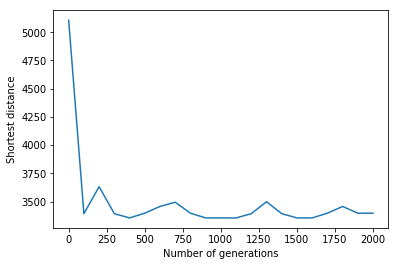

In [28]:
plt.plot(nb_generations, bests)
plt.xlabel("Number of generations")
plt.ylabel("Shortest distance")
plt.show()

### Testing the mutation rate

In [29]:
mutation_rates = np.arange(0, 0.05, 0.005)
bests = []
for mr in mutation_rates:
    for i in np.arange(10):
        ga = init_ga(1000, 1, mr, 80)
        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8178.97(8474.48)/5476.48(5186.14)/6815.81(6815.81)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [6272.00(5186.14)/6272.00(5186.14)/6272.00(5186.14)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [6272.00(5186.14)/6272.00(5186.14)/6272.00(5186.14)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [6272.00(5186.14)/6272.00(5186.14)/6272.00(5186.14)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [6272.00(5186.14)/6272.00(5186.14)/6272.00(5186.14)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [6272.00(5186.14)/6272.00(5186.14)/6272.00(5186.14)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [6272.00(5186.14)/6272.00(5186.14)/6272.00(5186.14)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [6272.00(5186.14)/6272.00(5186.14)/6272.00(5186.14)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [6272.00(5186.14)/6272.00(5186.14)/6272.00(5186.14)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [6272.00(5186.14)/6272.00(5186.14)/6272.00(5186.14)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [6144.00(5072.60)/6144.00(5072.60)/6144.00(5072.60)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [6144.00(5072.60)/6144.00(5072.60)/6144.00(5072.60)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [6144.00(5072.60)/6144.00(5072.60)/6144.00(5072.60)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [6144.00(5072.60)/6144.00(5072.60)/6144.00(5072.60)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [6144.00(5072.60)/6144.00(5072.60)/6144.00(5072.60)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [6144.00(5072.60)/6144.00(5072.60)/6144.00(5072.60)]
Total time elapsed: 5.420 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7989.12(8081.85)/5061.19(4950.02)/6657.60(6657.60)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [6144.00(4950.02)/6144.00(4950.02)/6144.00(4950.02)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [6144.00(4950.02)/6144.00(4950.02)/6144.00(4950.02)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [6144.00(4950.02)/6144.00(4950.02)/6144.00(4950.0

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4219.54(5057.34)/3488.83(3456.13)/3516.28(3516.28)]
Total time elapsed: 6.638 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8206.43(8680.20)/5716.57(5327.88)/6838.69(6838.69)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4119.35(4905.06)/3413.86(3392.19)/3432.79(3432.79)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4102.56(4528.31)/3402.40(3392.19)/3418.80(3418.80)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4112.56(4826.08)/3410.01(3392.19)/3427.13(3427.13)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4230.39(5814.61)/3484.32(3392.19)/3525.32(3525.32)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4112.72(5719.93)/3416.78(3392.19)/3427.27(3427.27)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4118.14(5584.10)/3419.16(3392.19)/3431.78(3431.78)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4099.99(4541.07)/3401.79(3392.19)/3416.66(3416.66)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4080.79(4070.06)/3392.05(3392.19)/3400.66(3400.6

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4289.35(5143.67)/3539.61(3497.97)/3574.46(3574.46)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4331.58(5986.35)/3575.73(3497.97)/3609.65(3609.65)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4364.66(5533.26)/3583.79(3497.97)/3637.21(3637.21)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4409.52(6163.34)/3622.44(3497.97)/3674.60(3674.60)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4429.21(5920.39)/3627.09(3497.97)/3691.00(3691.00)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4416.50(5822.66)/3617.73(3497.97)/3680.42(3680.42)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4269.23(6118.74)/3541.10(3497.97)/3557.69(3557.69)]
Total time elapsed: 6.732 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8140.02(8405.20)/4917.17(4552.40)/6783.35(6783.35)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4703.13(6270.00)/3887.06(3822.65)/3919.28(3919.28)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4705.02(6012.17)/3884.03(3822.65)/3920.85(3920.8

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4279.64(5897.28)/3514.34(3396.36)/3566.36(3566.36)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4236.86(5205.44)/3474.07(3396.36)/3530.71(3530.71)]
Total time elapsed: 6.686 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8234.61(8482.33)/5668.33(5452.85)/6862.17(6862.17)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4284.26(5604.56)/3509.19(3396.36)/3570.21(3570.21)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4268.64(5716.58)/3504.21(3396.36)/3557.20(3557.20)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4217.38(5484.33)/3472.33(3396.36)/3514.48(3514.48)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4426.56(7444.15)/3631.35(3396.36)/3688.80(3688.80)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4192.57(5506.99)/3459.98(3396.36)/3493.80(3493.80)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4296.41(5506.99)/3511.97(3396.36)/3580.35(3580.35)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4215.54(6974.19)/3489.28(3396.36)/3512.95(3512.9

Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4428.24(5845.26)/3647.38(3565.15)/3690.20(3690.20)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4494.52(5868.27)/3681.82(3565.15)/3745.43(3745.43)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4478.88(5964.63)/3676.47(3565.15)/3732.40(3732.40)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4466.06(5354.05)/3650.32(3565.15)/3721.72(3721.72)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4463.49(5637.57)/3659.68(3565.15)/3719.57(3719.57)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4655.60(6838.45)/3797.18(3565.15)/3879.67(3879.67)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4575.49(7365.61)/3759.72(3565.15)/3812.90(3812.90)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4472.64(5964.63)/3673.21(3565.15)/3727.20(3727.20)]
Total time elapsed: 6.785 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8045.32(8382.49)/5245.16(4878.23)/6704.43(6704.43)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4206.56(5753.88)/3458.40(3354.52)/3505.46(3505.4

Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4545.64(6035.89)/3706.97(3547.51)/3788.03(3788.03)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4505.26(5904.02)/3682.12(3547.51)/3754.38(3754.38)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4316.98(5772.62)/3529.58(3392.19)/3597.49(3597.49)]
Total time elapsed: 6.736 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8169.34(8521.99)/5447.46(5095.12)/6807.78(6807.78)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4735.13(6189.52)/3874.27(3742.17)/3945.94(3945.94)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4690.33(5698.96)/3835.94(3742.17)/3908.61(3908.61)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4613.08(5698.96)/3801.93(3742.17)/3844.24(3844.24)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4714.49(6230.55)/3865.05(3742.17)/3928.74(3928.74)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4821.24(6164.59)/3914.58(3742.17)/4017.70(4017.70)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4777.82(6617.20)/3909.20(3742.17)/3981.51(3981.5

Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4545.47(5982.20)/3651.28(3392.19)/3787.89(3787.89)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4430.64(6098.88)/3600.15(3392.19)/3692.20(3692.20)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4452.62(5814.61)/3598.24(3392.19)/3710.51(3710.51)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4357.79(5596.78)/3543.05(3392.19)/3631.49(3631.49)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4460.70(7756.92)/3657.43(3392.19)/3717.25(3717.25)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4558.81(6685.06)/3691.91(3392.19)/3799.01(3799.01)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4297.90(6202.45)/3529.82(3392.19)/3581.58(3581.58)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4354.31(5814.61)/3550.11(3392.19)/3628.59(3628.59)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4476.41(5814.61)/3609.30(3392.19)/3730.34(3730.34)]
Total time elapsed: 6.758 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8046.49(8540.20)/5376.17(4886.82)/6705.41(6705.4

Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4414.64(6206.34)/3596.63(3396.36)/3678.87(3678.87)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4558.93(5884.74)/3652.38(3396.36)/3799.11(3799.11)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4509.65(6109.55)/3642.44(3396.36)/3758.04(3758.04)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4409.78(5884.74)/3582.21(3396.36)/3674.81(3674.81)]
Total time elapsed: 6.737 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8268.89(8253.53)/4884.88(4907.23)/6890.74(6890.74)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4521.60(7249.44)/3678.50(3354.52)/3768.00(3768.00)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4427.73(6117.66)/3587.88(3354.52)/3689.78(3689.78)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4318.62(6282.09)/3533.31(3354.52)/3598.85(3598.85)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4624.06(5776.94)/3653.51(3354.52)/3853.38(3853.38)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4536.95(7663.02)/3697.76(3354.52)/3780.79(3780.7

Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4550.82(6294.54)/3701.85(3493.79)/3792.35(3792.35)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4708.17(6103.88)/3768.84(3493.79)/3923.47(3923.47)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4769.27(5982.17)/3784.12(3493.79)/3974.39(3974.39)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4397.39(5588.29)/3599.46(3493.79)/3664.49(3664.49)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4722.66(5893.15)/3757.93(3493.79)/3935.55(3935.55)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4660.26(6105.16)/3747.29(3493.79)/3883.55(3883.55)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4580.50(5753.08)/3689.60(3493.79)/3817.08(3817.08)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4461.84(6107.30)/3648.35(3493.79)/3718.20(3718.20)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4491.94(6307.08)/3670.43(3493.79)/3743.29(3743.29)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4820.01(6764.59)/3863.81(3493.79)/4016.67(4016.67)]
Total time elapsed: 7.273 se

Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4499.10(5814.61)/3619.61(3392.19)/3749.25(3749.25)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4619.23(7475.99)/3752.31(3392.19)/3849.36(3849.36)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4528.45(5729.88)/3626.51(3392.19)/3773.71(3773.71)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4606.29(6427.16)/3706.19(3392.19)/3838.58(3838.58)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4681.76(5880.57)/3700.67(3392.19)/3901.47(3901.47)]
Total time elapsed: 7.294 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8180.17(8293.70)/5733.69(5643.50)/6816.81(6816.81)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [5745.77(7157.04)/4609.31(4345.77)/4788.15(4788.15)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [5547.60(7170.34)/4522.37(4345.77)/4623.00(4623.00)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [5587.69(7189.79)/4542.22(4345.77)/4656.41(4656.41)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [5610.53(7983.79)/4576.62(4325.82)/4675.45(4675.4

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7967.98(8340.61)/5374.87(5019.88)/6639.99(6639.99)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4711.57(6934.67)/3786.89(3392.19)/3926.31(3926.31)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4662.65(6315.75)/3727.78(3392.19)/3885.54(3885.54)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4446.79(5846.57)/3597.14(3392.19)/3705.66(3705.66)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4808.64(6866.25)/3834.80(3392.19)/4007.20(4007.20)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4613.09(7007.09)/3734.35(3392.19)/3844.24(3844.24)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4791.00(7314.42)/3848.20(3392.19)/3992.50(3992.50)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4611.20(6840.76)/3727.19(3392.19)/3842.67(3842.67)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4707.15(6034.74)/3725.60(3392.19)/3922.63(3922.63)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4635.17(6273.92)/3711.92(3392.19)/3862.64(3862.64)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4740.48(6590.56)/3772.08(3354.52)/3950.40(3950.40)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4568.63(6228.24)/3664.82(3354.52)/3807.19(3807.19)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4626.63(5842.90)/3661.14(3354.52)/3855.53(3855.53)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4528.00(6526.43)/3658.53(3354.52)/3773.33(3773.33)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4700.02(7244.72)/3784.36(3354.52)/3916.68(3916.68)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4599.71(6074.91)/3669.44(3354.52)/3833.10(3833.10)]
Total time elapsed: 6.830 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7996.76(8007.04)/4375.02(4357.37)/6663.97(6663.97)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4833.16(6657.98)/3905.45(3628.66)/4027.64(4027.64)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [5079.66(6713.05)/4026.73(3628.66)/4233.05(4233.05)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4871.96(6952.26)/3938.88(3628.66)/4059.97(4059.9

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4782.61(6415.00)/3792.21(3396.36)/3985.51(3985.51)]
Total time elapsed: 6.843 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8009.21(8508.12)/5120.57(4539.85)/6674.34(6674.34)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [5018.77(7089.28)/4039.22(3685.02)/4182.31(4182.31)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4904.20(6173.40)/3929.43(3685.02)/4086.83(4086.83)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4915.15(6132.37)/3930.65(3685.02)/4095.96(4095.96)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [5084.72(6924.32)/4063.10(3685.02)/4237.26(4237.26)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4879.29(6621.81)/3944.82(3685.02)/4066.07(4066.07)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4849.27(6250.44)/3910.81(3685.02)/4041.05(4041.05)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4889.80(6387.60)/3937.47(3685.02)/4074.83(4074.83)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [5076.00(6874.38)/4055.65(3685.02)/4230.00(4230.0

In [ ]:
plt.plot(mutation_rates, bests)
plt.xlabel("Mutation rate")
plt.ylabel("Shortest distance")
plt.show()

### Testing the population size

In [ ]:
population_sizes = np.arange(50, 201, 20)
bests = []
for ps in population_sizes:
    for i in np.arange(10):
        ga = init_ga(1000, 1, 0.02, ps)
        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

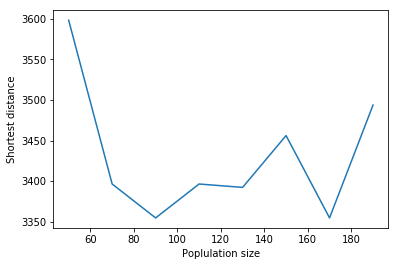

In [11]:
plt.plot(population_sizes, bests)
plt.xlabel("Poplulation size")
plt.ylabel("Shortest distance")
plt.show()

### Testing crossover rate

In [31]:
crossover_rates = np.arange(0.1, 1.1, 0.1)
bests = []
for cr in crossover_rates:
    for i in np.arange(20):
        ga = init_ga(1000, cr, 0.02, 80)
        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8055.82(8685.20)/5786.95(5352.76)/6713.19(6713.19)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4574.30(5759.81)/3721.44(3580.75)/3811.91(3811.91)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4569.31(5855.49)/3723.33(3580.75)/3807.76(3807.76)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4556.05(6028.10)/3723.22(3580.75)/3796.71(3796.71)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4559.26(5905.43)/3720.50(3580.75)/3799.38(3799.38)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4562.01(6003.17)/3725.37(3580.75)/3801.67(3801.67)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4518.80(5980.11)/3702.78(3580.75)/3765.67(3765.67)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4597.83(5980.11)/3742.09(3580.75)/3831.53(3831.53)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4482.69(5702.72)/3676.77(3580.75)/3735.58(3735.58)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4527.65(6028.10)/3708.69(3580.75)/3773.04(3773.04)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4442.58(6011.88)/3602.78(3392.19)/3702.15(3702.15)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4313.88(5938.08)/3532.70(3392.19)/3594.90(3594.90)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4298.76(5607.39)/3515.04(3392.19)/3582.30(3582.30)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4260.48(6356.61)/3510.37(3392.19)/3550.40(3550.40)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4370.83(6002.19)/3565.13(3392.19)/3642.36(3642.36)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4439.69(7511.10)/3640.03(3392.19)/3699.74(3699.74)]
Total time elapsed: 5.357 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8036.35(8358.49)/5115.87(4735.60)/6696.96(6696.96)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4320.49(5842.90)/3521.45(3354.52)/3600.41(3600.41)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4223.80(5477.29)/3460.38(3354.52)/3519.83(3519.83)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4495.25(5870.82)/3607.99(3354.52)/3746.04(3746.0

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4529.75(6118.45)/3672.14(3456.13)/3774.80(3774.80)]
Total time elapsed: 5.364 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8093.03(8280.35)/5585.55(5424.64)/6744.19(6744.19)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4802.67(5525.89)/3904.61(3816.41)/4002.22(4002.22)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4826.47(6031.33)/3939.72(3816.41)/4022.05(4022.05)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4426.88(5944.51)/3612.87(3456.13)/3689.07(3689.07)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4516.85(5855.49)/3653.21(3456.13)/3764.04(3764.04)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4492.20(5944.51)/3645.75(3456.13)/3743.50(3743.50)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4394.11(6686.32)/3611.97(3456.13)/3661.76(3661.76)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4406.81(6233.68)/3610.34(3456.13)/3672.34(3672.34)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4416.52(5903.48)/3606.16(3456.13)/3680.43(3680.4

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4279.38(5843.71)/3512.98(3396.36)/3566.15(3566.15)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4379.53(5721.05)/3560.37(3396.36)/3649.61(3649.61)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4480.29(6042.16)/3624.50(3396.36)/3733.58(3733.58)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4362.94(5884.74)/3558.37(3396.36)/3635.78(3635.78)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4400.36(5989.77)/3581.53(3396.36)/3666.97(3666.97)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4368.04(6505.08)/3578.12(3396.36)/3640.03(3640.03)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4280.83(5884.74)/3514.71(3396.36)/3567.36(3567.36)]
Total time elapsed: 5.549 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8228.74(8415.19)/5699.02(5541.56)/6857.28(6857.28)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4799.34(6510.63)/3938.93(3809.45)/3999.45(3999.45)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4961.46(7729.34)/4059.77(3809.45)/4134.55(4134.5

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4300.31(5584.10)/3515.02(3392.19)/3583.59(3583.59)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4555.88(7191.65)/3706.13(3392.19)/3796.56(3796.56)]
Total time elapsed: 5.555 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8170.71(8326.86)/5119.39(4925.67)/6808.93(6808.93)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4368.83(5878.55)/3580.64(3456.13)/3640.69(3640.69)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4515.14(6742.60)/3685.22(3456.13)/3762.62(3762.62)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4485.21(5903.48)/3640.50(3456.13)/3737.67(3737.67)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4567.57(6799.54)/3717.25(3456.13)/3806.31(3806.31)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4446.68(5903.48)/3621.46(3456.13)/3705.56(3705.56)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4528.44(6087.33)/3670.10(3456.13)/3773.70(3773.70)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4321.76(5578.90)/3548.53(3456.13)/3601.47(3601.4

Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4220.03(5486.69)/3472.24(3392.19)/3516.69(3516.69)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4275.06(5607.39)/3503.19(3392.19)/3562.55(3562.55)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4327.74(5791.55)/3535.72(3392.19)/3606.45(3606.45)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4203.57(5584.10)/3465.68(3392.19)/3502.97(3502.97)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4341.99(5848.33)/3544.94(3392.19)/3618.32(3618.32)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4319.89(5791.55)/3531.67(3392.19)/3599.91(3599.91)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4406.00(5880.57)/3578.76(3392.19)/3671.67(3671.67)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4450.90(6483.26)/3624.34(3392.19)/3709.08(3709.08)]
Total time elapsed: 5.588 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8050.93(7998.72)/4259.80(4355.10)/6709.11(6709.11)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4509.46(6398.52)/3683.91(3497.97)/3757.89(3757.8

Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4692.96(6017.77)/3802.26(3618.41)/3910.80(3910.80)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4559.71(5968.77)/3736.22(3618.41)/3799.76(3799.76)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4518.55(5433.95)/3699.09(3618.41)/3765.46(3765.46)]
Total time elapsed: 5.721 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8159.91(8653.48)/5397.37(4888.36)/6799.92(6799.92)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4299.82(5197.97)/3500.27(3396.36)/3583.19(3583.19)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4260.91(5347.19)/3489.73(3396.36)/3550.76(3550.76)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4268.45(5484.33)/3497.73(3396.36)/3557.05(3557.05)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4299.83(5898.12)/3525.36(3396.36)/3583.19(3583.19)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4352.05(5843.71)/3551.35(3396.36)/3626.71(3626.71)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4461.95(6849.57)/3641.83(3396.36)/3718.29(3718.2

Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4426.54(5944.51)/3612.69(3456.13)/3688.78(3688.78)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4268.71(5581.97)/3521.72(3456.13)/3557.26(3557.26)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4392.11(6301.77)/3603.57(3456.13)/3660.09(3660.09)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4443.30(5780.82)/3614.87(3456.13)/3702.75(3702.75)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4404.56(5699.72)/3592.93(3456.13)/3670.47(3670.47)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4342.05(6087.79)/3570.83(3456.13)/3618.37(3618.37)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4356.04(5903.48)/3574.50(3456.13)/3630.04(3630.04)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4435.61(5999.29)/3619.23(3456.13)/3696.34(3696.34)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4513.28(5888.29)/3653.24(3456.13)/3761.07(3761.07)]
Total time elapsed: 5.726 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8246.43(8309.04)/5457.20(5392.75)/6872.03(6872.0

Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4384.54(6299.95)/3571.14(3354.52)/3653.79(3653.79)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4199.84(5090.69)/3435.91(3354.52)/3499.86(3499.86)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4424.65(5801.87)/3571.19(3354.52)/3687.21(3687.21)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4365.95(5477.29)/3526.01(3354.52)/3638.30(3638.30)]
Total time elapsed: 5.798 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8180.02(8320.04)/5122.62(4948.64)/6816.68(6816.68)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4511.98(6466.19)/3702.10(3551.68)/3759.98(3759.98)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4604.67(6040.06)/3737.75(3551.68)/3837.23(3837.23)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4415.71(6737.37)/3648.93(3551.68)/3679.76(3679.76)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4344.91(5843.71)/3547.66(3396.36)/3620.76(3620.76)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4415.35(7443.00)/3624.10(3396.36)/3679.46(3679.4

Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4410.59(5884.74)/3582.62(3396.36)/3675.49(3675.49)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4440.80(6808.18)/3628.19(3396.36)/3700.66(3700.66)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4311.53(5843.71)/3530.18(3396.36)/3592.94(3592.94)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4351.96(5843.71)/3551.30(3396.36)/3626.63(3626.63)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4414.71(5884.74)/3584.67(3396.36)/3678.92(3678.92)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4331.19(5843.71)/3540.52(3396.36)/3609.33(3609.33)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4456.31(5874.75)/3604.57(3396.36)/3713.59(3713.59)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4338.65(5400.97)/3526.77(3396.36)/3615.54(3615.54)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4278.55(5286.09)/3495.38(3396.36)/3565.46(3565.46)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4245.17(6400.34)/3502.72(3396.36)/3537.64(3537.64)]
Total time elapsed: 5.921 se

Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4384.42(5880.57)/3567.87(3392.19)/3653.68(3653.68)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4254.48(6055.55)/3502.12(3392.19)/3545.40(3545.40)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4386.15(5814.61)/3566.12(3392.19)/3655.12(3655.12)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4355.82(5742.55)/3548.18(3392.19)/3629.85(3629.85)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4326.67(5791.55)/3535.17(3392.19)/3605.56(3605.56)]
Total time elapsed: 5.500 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8035.97(8141.35)/5365.45(5260.71)/6696.64(6696.64)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4304.17(5814.61)/3524.14(3392.19)/3586.81(3586.81)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4484.38(6704.46)/3650.14(3392.19)/3736.98(3736.98)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4294.56(5484.68)/3508.72(3392.19)/3578.80(3578.80)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4366.68(5734.88)/3553.23(3392.19)/3638.90(3638.9

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8343.70(8519.44)/5376.48(5177.24)/6953.08(6953.08)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4454.57(5671.10)/3592.47(3396.36)/3712.14(3712.14)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4397.01(5795.72)/3572.10(3396.36)/3664.17(3664.17)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4346.83(5795.72)/3547.02(3396.36)/3622.36(3622.36)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4266.96(5286.09)/3490.27(3396.36)/3555.80(3555.80)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4391.28(5818.78)/3570.25(3396.36)/3659.40(3659.40)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4450.10(6428.27)/3623.32(3396.36)/3708.41(3708.41)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4463.37(5998.17)/3613.99(3396.36)/3719.47(3719.47)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4384.43(5995.23)/3573.39(3396.36)/3653.69(3653.69)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4354.03(6099.32)/3560.23(3396.36)/3628.36(3628.36)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4547.05(5997.79)/3723.74(3598.43)/3789.21(3789.21)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4520.16(5997.79)/3709.94(3598.43)/3766.80(3766.80)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4516.79(6502.57)/3718.48(3598.43)/3763.99(3763.99)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4526.64(5787.95)/3707.16(3598.43)/3772.20(3772.20)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4594.77(5791.11)/3739.00(3598.43)/3828.98(3828.98)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4610.65(6054.58)/3757.53(3598.43)/3842.21(3842.21)]
Total time elapsed: 6.079 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8104.44(8274.75)/4983.34(4760.12)/6753.70(6753.70)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4281.77(5561.06)/3506.63(3396.36)/3568.14(3568.14)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4314.30(5795.72)/3530.26(3396.36)/3595.25(3595.25)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4365.51(5843.71)/3558.24(3396.36)/3637.92(3637.9

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4515.41(6069.13)/3703.42(3580.75)/3762.84(3762.84)]
Total time elapsed: 5.873 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8179.76(8528.51)/5530.42(5201.43)/6816.47(6816.47)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4649.87(6062.68)/3791.78(3640.27)/3874.89(3874.89)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4530.63(5128.12)/3700.01(3640.27)/3775.52(3775.52)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4860.54(7105.08)/3941.67(3640.27)/4050.45(4050.45)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4819.36(6267.81)/3882.05(3640.27)/4016.13(4016.13)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4627.16(5915.01)/3775.18(3640.27)/3855.96(3855.96)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4647.14(6087.62)/3791.37(3640.27)/3872.62(3872.62)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4585.20(5529.99)/3740.18(3640.27)/3821.00(3821.00)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4567.92(6562.58)/3760.65(3640.27)/3806.60(3806.6

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4579.32(5878.55)/3682.89(3456.13)/3816.10(3816.10)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4348.85(6079.20)/3574.47(3456.13)/3624.04(3624.04)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4299.49(4977.56)/3517.77(3456.13)/3582.90(3582.90)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4533.57(5780.82)/3656.55(3456.13)/3777.97(3777.97)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4454.60(5645.65)/3613.85(3456.13)/3712.17(3712.17)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4400.93(5878.55)/3597.34(3456.13)/3667.44(3667.44)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4405.77(5855.49)/3599.07(3456.13)/3671.47(3671.47)]
Total time elapsed: 5.866 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8254.75(8649.88)/5602.08(5235.36)/6878.95(6878.95)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4470.99(5884.74)/3612.11(3396.36)/3725.83(3725.83)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4440.85(6519.27)/3620.79(3396.36)/3700.71(3700.7

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4362.11(5842.90)/3542.70(3354.52)/3635.09(3635.09)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4497.30(6902.62)/3654.33(3354.52)/3747.75(3747.75)]
Total time elapsed: 5.867 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8263.28(8318.06)/5222.06(5155.86)/6886.06(6886.06)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4327.05(5210.23)/3509.82(3392.19)/3605.88(3605.88)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4386.93(5826.96)/3567.01(3392.19)/3655.78(3655.78)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4415.42(6027.15)/3589.45(3392.19)/3679.52(3679.52)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4396.39(5880.57)/3573.93(3392.19)/3663.66(3663.66)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4374.33(5742.55)/3557.29(3392.19)/3645.27(3645.27)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4480.02(5880.57)/3614.72(3392.19)/3733.35(3733.35)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4393.09(6098.88)/3580.21(3392.19)/3660.91(3660.9

Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4345.87(5742.55)/3543.23(3392.19)/3621.56(3621.56)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4317.71(5584.10)/3523.49(3392.19)/3598.10(3598.10)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4353.89(5791.55)/3549.06(3392.19)/3628.24(3628.24)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4288.27(5814.61)/3515.71(3392.19)/3573.56(3573.56)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4493.81(6078.31)/3631.65(3392.19)/3744.84(3744.84)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4400.42(5742.55)/3569.90(3392.19)/3667.02(3667.02)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4390.02(5880.57)/3570.71(3392.19)/3658.35(3658.35)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4441.83(5814.61)/3593.15(3392.19)/3701.53(3701.53)]
Total time elapsed: 6.335 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8279.44(8305.18)/4789.05(4749.67)/6899.53(6899.53)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4350.18(6089.40)/3557.84(3396.36)/3625.15(3625.1

Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4310.62(5801.87)/3514.91(3354.52)/3592.18(3592.18)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4295.54(6400.72)/3522.49(3354.52)/3579.62(3579.62)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4407.70(6888.45)/3600.30(3354.52)/3673.08(3673.08)]
Total time elapsed: 6.506 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8283.96(8737.05)/5881.14(5545.70)/6903.30(6903.30)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4339.06(5607.39)/3534.65(3392.19)/3615.89(3615.89)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4531.41(6357.92)/3663.85(3392.19)/3776.18(3776.18)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4417.26(5425.06)/3559.11(3392.19)/3681.05(3681.05)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4271.18(5486.69)/3497.59(3392.19)/3559.32(3559.32)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4464.01(7024.34)/3646.20(3392.19)/3720.01(3720.01)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4557.94(6728.30)/3693.00(3392.19)/3798.29(3798.2

Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4294.87(6177.26)/3527.57(3392.19)/3579.06(3579.06)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4500.56(5814.61)/3620.27(3392.19)/3750.47(3750.47)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4416.05(6803.21)/3612.20(3392.19)/3680.04(3680.04)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4338.98(5690.52)/3537.87(3392.19)/3615.82(3615.82)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4388.84(6276.72)/3583.31(3392.19)/3657.37(3657.37)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4379.03(5791.55)/3561.64(3392.19)/3649.19(3649.19)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4314.28(5486.69)/3518.04(3392.19)/3595.23(3595.23)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4214.07(5357.56)/3466.24(3392.19)/3511.72(3511.72)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4353.49(5880.57)/3551.98(3392.19)/3627.91(3627.91)]
Total time elapsed: 6.492 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8156.87(8785.11)/5385.95(4733.69)/6797.39(6797.3

Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4326.98(5629.26)/3516.25(3354.52)/3605.82(3605.82)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4310.79(5842.90)/3516.41(3354.52)/3592.32(3592.32)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4474.69(5842.90)/3596.83(3354.52)/3728.91(3728.91)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4318.35(6590.56)/3539.91(3354.52)/3598.63(3598.63)]
Total time elapsed: 6.737 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8180.49(8358.18)/5709.11(5564.71)/6817.08(6817.08)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4437.58(5982.17)/3631.87(3493.79)/3697.98(3697.98)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4493.70(5844.15)/3655.22(3493.79)/3744.75(3744.75)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4456.22(6306.09)/3650.57(3493.79)/3713.52(3713.52)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4334.60(5685.70)/3570.93(3493.79)/3612.17(3612.17)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4414.87(5588.29)/3607.66(3493.79)/3679.06(3679.0

Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4468.72(6124.40)/3657.51(3509.84)/3723.94(3723.94)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4432.43(6090.42)/3637.02(3509.84)/3693.69(3693.69)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4654.28(5998.22)/3743.63(3509.84)/3878.56(3878.56)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4625.17(5998.22)/3730.45(3509.84)/3854.30(3854.30)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4398.39(5998.22)/3616.47(3509.84)/3665.32(3665.32)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4415.70(5957.20)/3624.85(3509.84)/3679.75(3679.75)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4618.06(6012.29)/3727.97(3509.84)/3848.38(3848.38)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4431.62(5559.05)/3620.51(3509.84)/3693.01(3693.01)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4454.17(6967.59)/3665.76(3509.84)/3711.81(3711.81)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4502.01(5782.76)/3662.34(3509.84)/3751.68(3751.68)]
Total time elapsed: 6.810 se

Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4374.04(6201.47)/3572.93(3392.19)/3645.03(3645.03)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4388.71(6328.14)/3584.67(3392.19)/3657.26(3657.26)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4318.11(6348.00)/3544.44(3392.19)/3598.42(3598.42)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4398.39(6014.45)/3580.09(3392.19)/3665.32(3665.32)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4451.02(5719.93)/3592.23(3392.19)/3709.18(3709.18)]
Total time elapsed: 6.722 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7986.52(8361.37)/5162.69(4742.32)/6655.43(6655.43)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4421.95(5576.76)/3595.81(3456.13)/3684.96(3684.96)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4376.32(5730.87)/3580.15(3456.13)/3646.93(3646.93)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4382.13(5730.87)/3583.05(3456.13)/3651.78(3651.78)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4352.55(5645.65)/3565.67(3456.13)/3627.12(3627.1

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8178.65(8367.68)/5256.04(5039.77)/6815.54(6815.54)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4648.45(5959.76)/3803.63(3685.02)/3873.71(3873.71)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4679.67(6173.40)/3826.07(3685.02)/3899.72(3899.72)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4672.87(6784.05)/3837.72(3685.02)/3894.06(3894.06)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4770.10(6173.40)/3870.18(3685.02)/3975.09(3975.09)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4753.64(5874.54)/3846.93(3685.02)/3961.36(3961.36)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4771.37(6789.70)/3893.86(3685.02)/3976.14(3976.14)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4695.16(6132.37)/3832.39(3685.02)/3912.63(3912.63)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4600.79(6173.40)/3785.16(3685.02)/3833.99(3833.99)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4505.18(5555.21)/3689.32(3598.43)/3754.32(3754.32)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4392.25(5570.39)/3598.03(3497.97)/3660.20(3660.20)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4482.90(7605.68)/3689.84(3497.97)/3735.75(3735.75)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4453.14(5873.85)/3637.87(3497.97)/3710.95(3710.95)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4494.18(6283.70)/3672.22(3497.97)/3745.15(3745.15)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4532.69(6159.76)/3688.69(3497.97)/3777.24(3777.24)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4510.94(5482.48)/3645.19(3497.97)/3759.11(3759.11)]
Total time elapsed: 6.737 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8181.99(8176.47)/5048.16(5055.32)/6818.32(6818.32)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4415.20(5940.85)/3573.64(3354.52)/3679.33(3679.33)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4127.01(4697.73)/3392.91(3354.52)/3439.18(3439.18)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4310.43(5753.88)/3513.10(3354.52)/3592.03(3592.0

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4419.00(5818.78)/3583.85(3396.36)/3682.50(3682.50)]
Total time elapsed: 6.779 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8127.32(8639.56)/5258.66(4686.09)/6772.77(6772.77)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4397.34(5707.27)/3608.98(3509.84)/3664.45(3664.45)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4571.72(5901.27)/3700.50(3509.84)/3809.77(3809.77)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4415.41(5854.29)/3622.10(3509.84)/3679.51(3679.51)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4494.91(6581.40)/3642.40(3354.52)/3745.76(3745.76)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4377.65(5635.90)/3540.31(3354.52)/3648.04(3648.04)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4313.85(5776.94)/3515.68(3354.52)/3594.87(3594.87)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4217.90(5629.26)/3461.59(3354.52)/3514.92(3514.92)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4385.67(5753.88)/3550.19(3354.52)/3654.73(3654.7

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4645.37(6422.11)/3797.55(3628.66)/3871.14(3871.14)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4379.65(5897.54)/3571.60(3409.16)/3649.71(3649.71)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4326.07(5753.88)/3520.99(3354.52)/3605.05(3605.05)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4319.32(5598.12)/3511.22(3354.52)/3599.43(3599.43)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4389.91(5629.26)/3545.51(3354.52)/3658.26(3658.26)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4305.21(5681.80)/3507.79(3354.52)/3587.68(3587.68)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4306.20(6147.51)/3522.88(3354.52)/3588.50(3588.50)]
Total time elapsed: 6.877 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8067.91(8592.57)/5212.25(4622.68)/6723.26(6723.26)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4321.17(6289.82)/3534.96(3354.52)/3600.97(3600.97)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4329.91(6160.30)/3536.51(3354.52)/3608.26(3608.2

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4369.39(6820.00)/3575.49(3354.52)/3641.15(3641.15)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4297.63(5801.87)/3508.19(3354.52)/3581.36(3581.36)]
Total time elapsed: 6.494 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7933.20(8344.84)/4944.72(4425.96)/6611.00(6611.00)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4598.11(6407.27)/3762.33(3598.43)/3831.75(3831.75)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4590.64(5756.24)/3735.54(3598.43)/3825.54(3825.54)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4491.84(5997.79)/3695.13(3598.43)/3743.20(3743.20)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4693.38(5997.79)/3793.92(3598.43)/3911.15(3911.15)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4616.39(5997.79)/3758.07(3598.43)/3846.99(3846.99)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4442.75(5855.49)/3617.64(3456.13)/3702.29(3702.29)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4462.13(7072.97)/3660.29(3456.13)/3718.44(3718.4

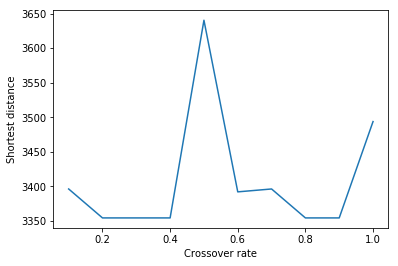

In [32]:
plt.plot(crossover_rates, bests)
plt.xlabel("Crossover rate")
plt.ylabel("Shortest distance")
plt.show()

### Testing the selection method

In [33]:
best_length = []
for i in np.arange(30):
    ga = ga.init(1000, 0.8, 0.02, 80)
    ga.selector.set(Selectors.GRankSelector)
    ga.evolve(freq_stats=100)
    best = ga.bestIndividual()
    best_length.append(tour_length(spherical_distances, best)) 
print np.mean(best_length)

AttributeError: GSimpleGA instance has no attribute 'init'

In [ ]:
best_length = []
for i in np.arange(30):
    ga = init_ga(1000, 0.8, 0.02, 80)
    ga.selector.set(Selectors.GTournamentSelector)
    ga.evolve(freq_stats=100)
    best = ga.bestIndividual()
    best_length.append(tour_length(spherical_distances, best)) 
print np.mean(np.array(best_length))

In [ ]:
print(np.mean(best_length))

In [ ]:
best_length = []
for i in np.arange(30):
    ga = ga.init(1000, 0.8, 0.02, 80)
    ga.selector.set(Selectors.GRouletteWheel)
    ga.evolve(freq_stats=100)
    best = ga.bestIndividual()
    best_length.append(tour_length(spherical_distances, best)) 
print np.mean(np.array(best_length))

### Plot the path

In [ ]:
ga = ga = ga.init(1000, 0.8, 0.02, 80)
ga.selector.set(Selectors.GRouletteWheel)

ga.evolve(freq_stats=100)
best = ga.bestIndividual()
print best
print(tour_length(spherical_distances, best))

In [ ]:
res_lat = []
res_lon = []
best.append(best[0])
for city_index in best:
    res_lat.append(LAT[city_index])
    res_lon.append(LON[city_index])
    
plt.plot(res_lat, res_lon, '-o', color='g')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()